In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
A = np.loadtxt('strXL_induced_matrix')

In [20]:
np.sum(A,axis=1)

array([100.00000143,  99.99999881,  99.99999964,  99.99999988,
       100.00000083, 100.00000072,  99.99999917,  99.99999833,
        99.99999821, 100.00000024, 100.00000095, 100.00000072,
       100.00000167, 100.00000036, 100.00000048, 100.00000036,
        99.99999893, 100.00000083, 100.00000131,  99.99999952,
        99.99999976,  99.99999952,  99.99999917, 100.00000167,
       100.00000143,  99.99999952, 100.00000119, 100.        ,
        99.99999893,  99.99999762,  99.99999964, 100.00000072,
       100.00000083,  99.99999952,  99.9999994 , 100.0000006 ,
       100.00000072, 100.        ,  99.99999976,  99.99999964,
       100.0000006 , 100.00000048, 100.00000048, 100.00000107,
       100.00000095, 100.        , 100.0000025 , 100.00000072,
        99.99999952])

In [15]:
# Start with non-negative, square matrix
N = A
# Makes N -doubly stochastic-
for _ in range(100):
    D_row = 1.0 / np.sqrt(N.sum(axis=1))
    D_col = 1.0 / np.sqrt(N.sum(axis=0))
    N = np.dot(np.dot(np.diag(D_row),N),np.diag(D_col))
# Scales N to make a joint probability distribution
N = N / N.sum() # Final globa

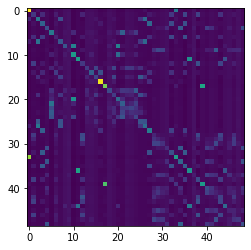

In [16]:
plt.imshow(N, interpolation='nearest')
#plt.xticks(np.arange(N.shape[0]),labels=np.arange(N.shape[0])+1)
#plt.yticks(np.arange(N.shape[1]),labels=np.arange(N.shape[1])+1)
plt.savefig('strXL_induced_heat_map.svg')
plt.show()

In [17]:
np.max(A)

3.749501943588257

In [5]:
N.sum()

1.0000000000000002

In [6]:
N.sum(axis=1)

array([0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816])

In [7]:
N.sum(axis=0)

array([0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.02040816, 0.02040816, 0.02040816])

In [9]:
# Doubly-stochastic normalization [N]
jointPDF = N + 0.000000000000001 # Avoid 0s
marginals = np.outer(jointPDF.sum(axis=1),jointPDF.sum(axis=0))
mutual_info = np.sum(jointPDF*np.log2(jointPDF/marginals))
mutual_info/np.log2(49)

0.00047390434555973294

In [10]:
# Alternative, naive normalization [A/A.sum()]
jointPDF = (A/A.sum()) + 0.000000000000001 # Avoid 0s
marginals = np.outer(jointPDF.sum(axis=1),jointPDF.sum(axis=0))
mutual_info = np.sum(jointPDF*np.log2(jointPDF/marginals))
mutual_info/np.log2(49)

0.00047692758576521686